In [1]:
## This Noteboook generates Diffusion Maps and Feature Plots in Figure 3 in Ori et al., 2020
## It is based on subsets generated in generate_subsets.ipynb

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd

In [2]:
## Colour Map for time points
from matplotlib import colors
gray_red = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "red", "darkred"], N = 128)

cmaplist = ["black", "purple", "darkblue", "cornflowerblue", "lightsteelblue",
            "red", "sandybrown", "gold", "peachpuff"] 
cm = colors.LinearSegmentedColormap.from_list("grouping", cmaplist, N = 11)
cols = [cm(i) for i in range(11)]

### Figure 3 a, e - Read in subsets and plot diffusion map for each stage

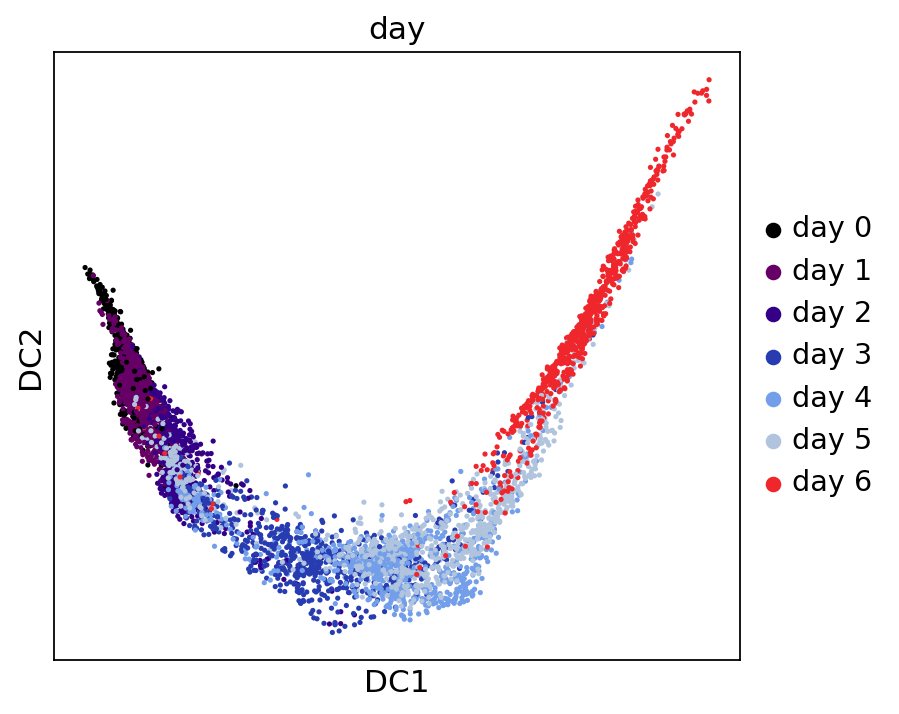

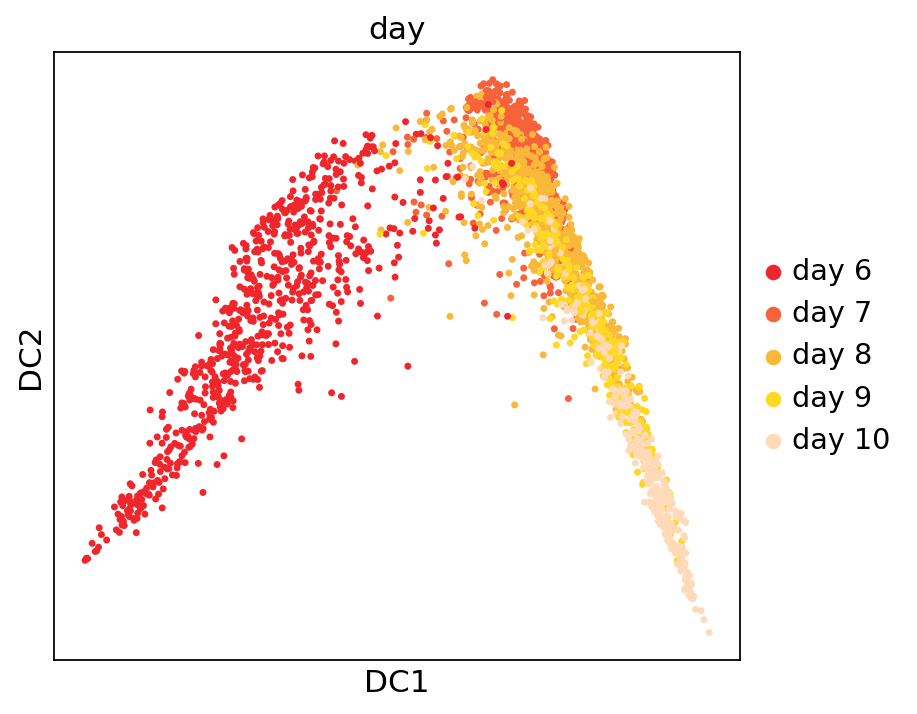

In [7]:
sc.set_figure_params(vector_friendly = True)
plt.rcParams["figure.figsize"] = (5.5, 5)
folder = "/20200806_Drukker_IPSlungProgenitors_meshal.ansari/"

## Definite Endoderm
de = sc.read(folder + "IPS_lung_differentiation_defendo.h5ad")
sc.pl.diffmap(de, color = ["day"], palette = cols[:7])

## Foregut Endoderm + day 6
fe = sc.read(folder + "IPS_lung_differentiation_forendo.h5ad")
sc.pl.diffmap(fe, color = ["day"], palette = cols[6:])

### Figure 3 b - Highlight cells expressing genes of interest in de stage

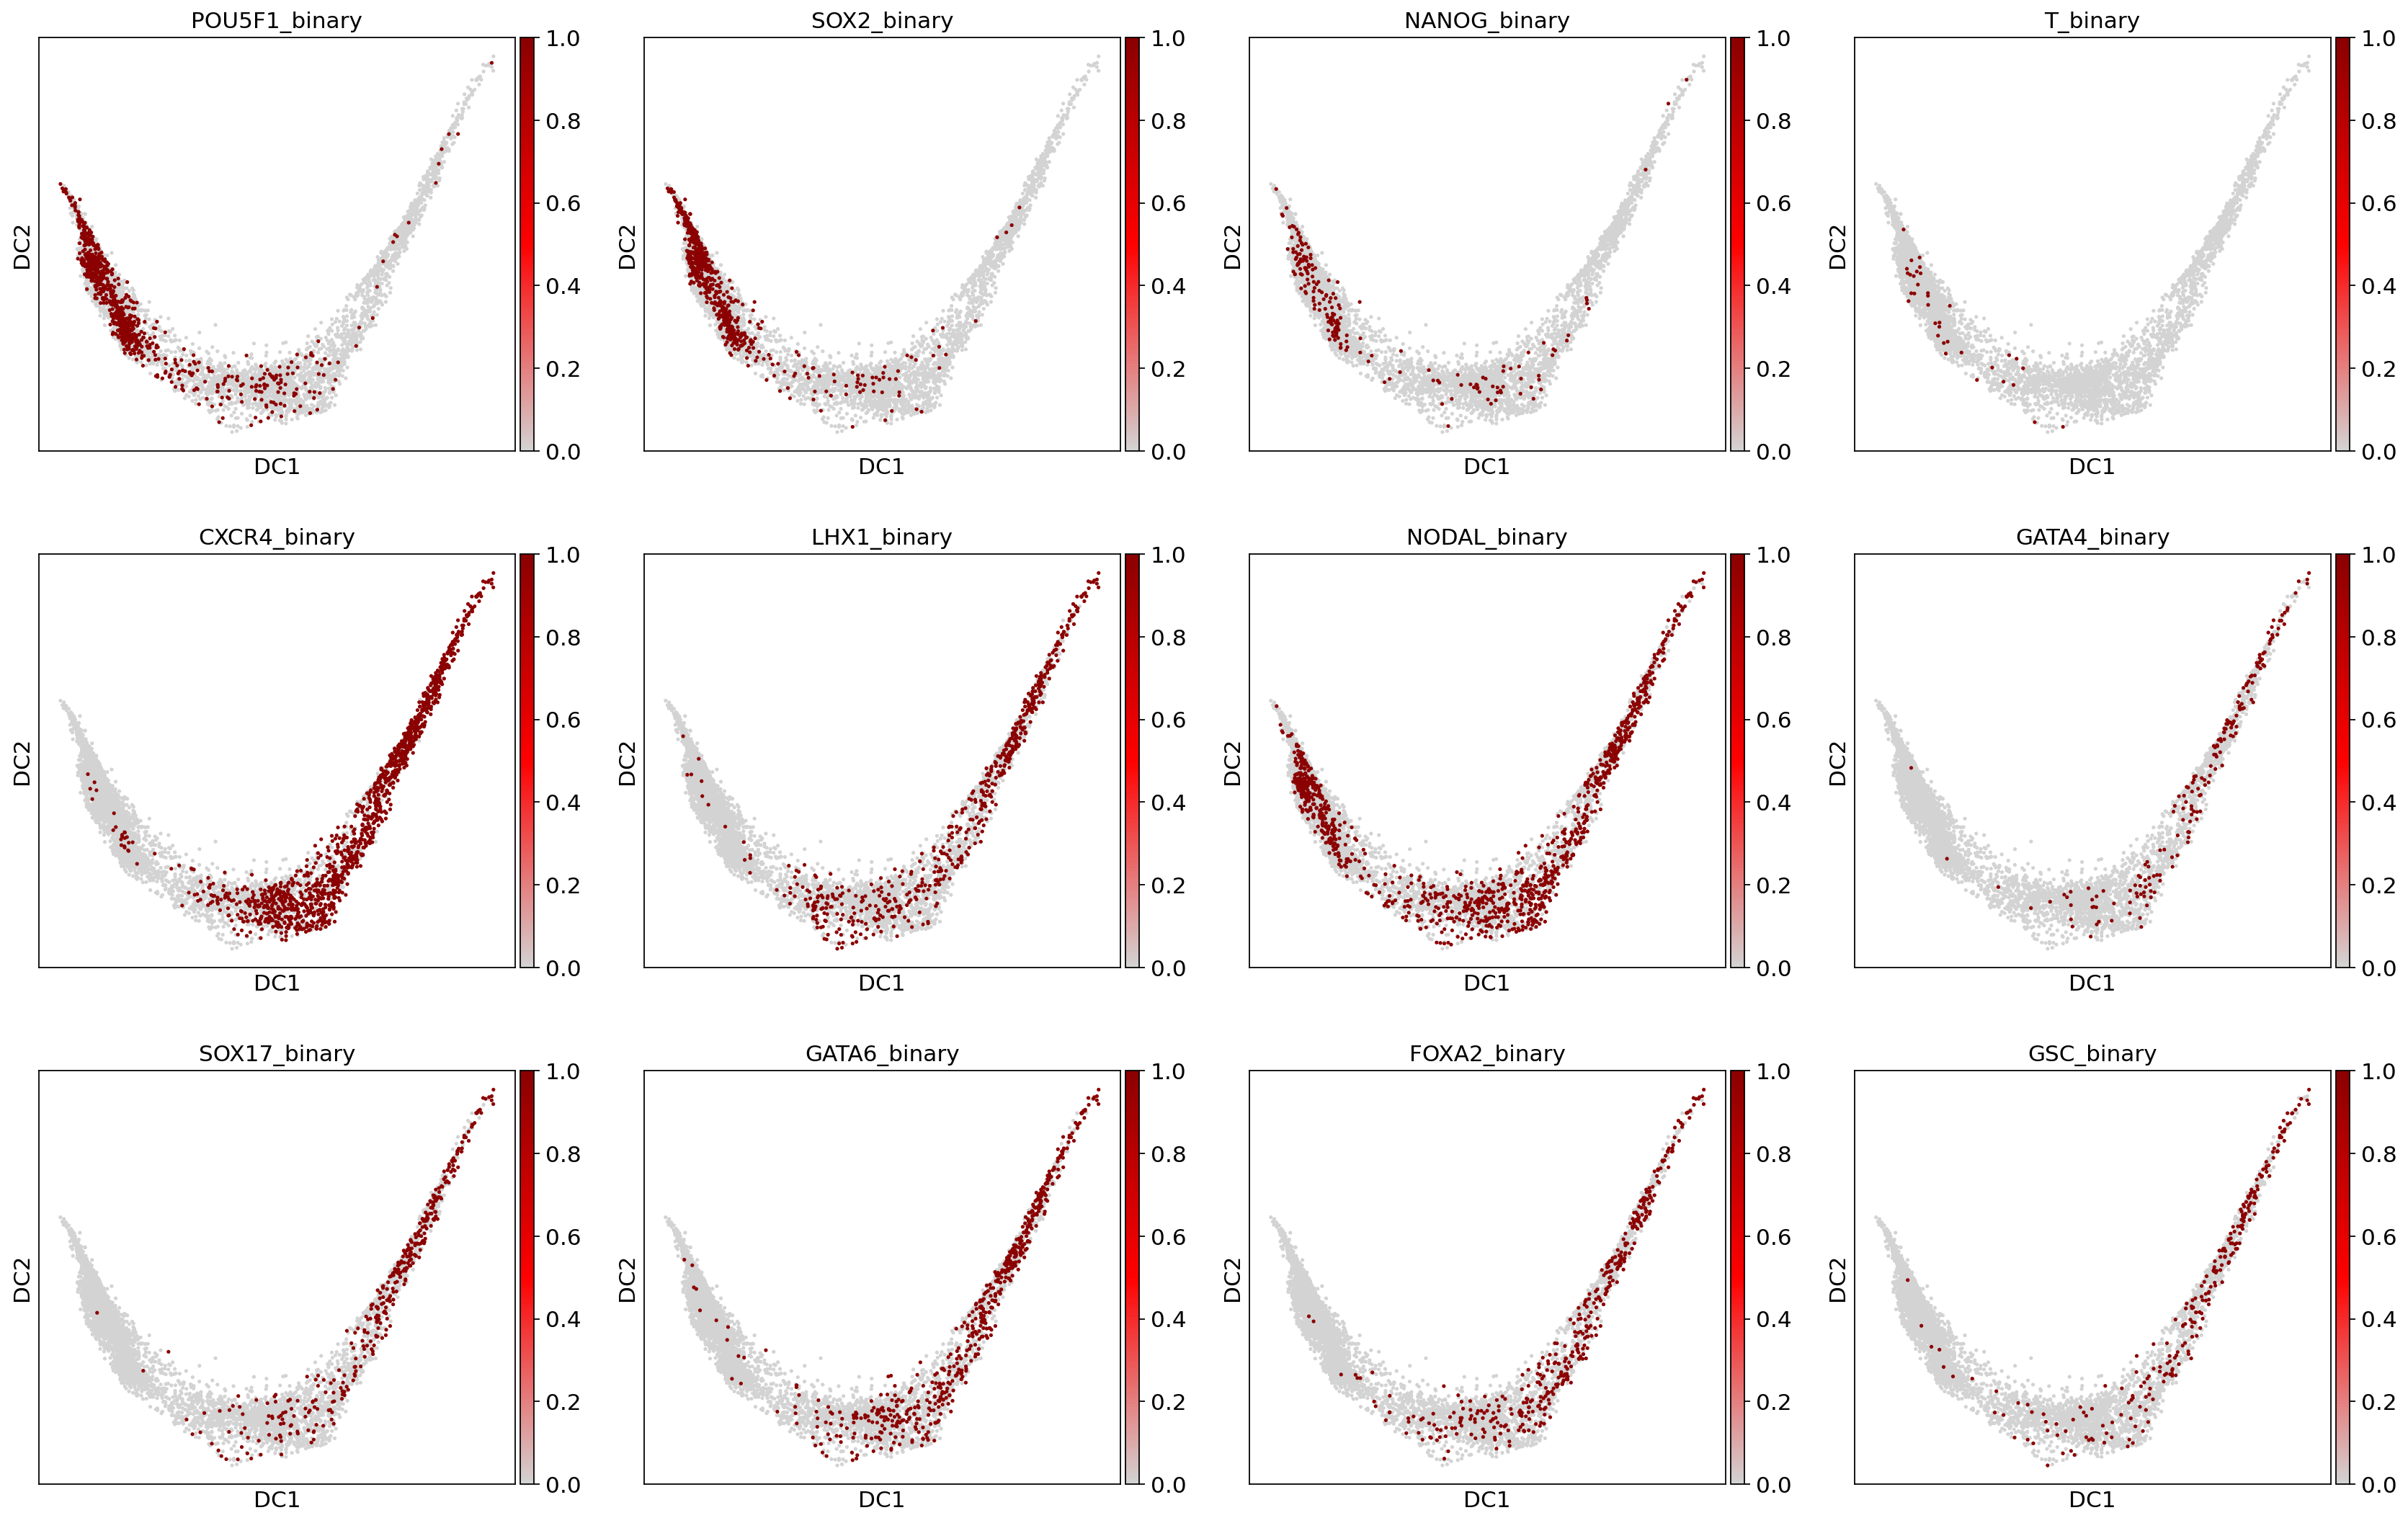

In [6]:
genes = ["POU5F1", "SOX2", "NANOG", "T", "CXCR4", "LHX1", "NODAL", "GATA4", "SOX17", "GATA6", "FOXA2", "GSC"]
genes_plot = []

for gene in genes:
    de.obs["%s_binary" %gene] = de.raw.X[:, np.where(de.var_names == gene)[0]].todense() > 0
    genes_plot.append("%s_binary" %gene)

sc.pl.diffmap(de, color = genes_plot, cmap = gray_red)

### Figure 3 f - Highlight cells expressing genes of interest in fe stage

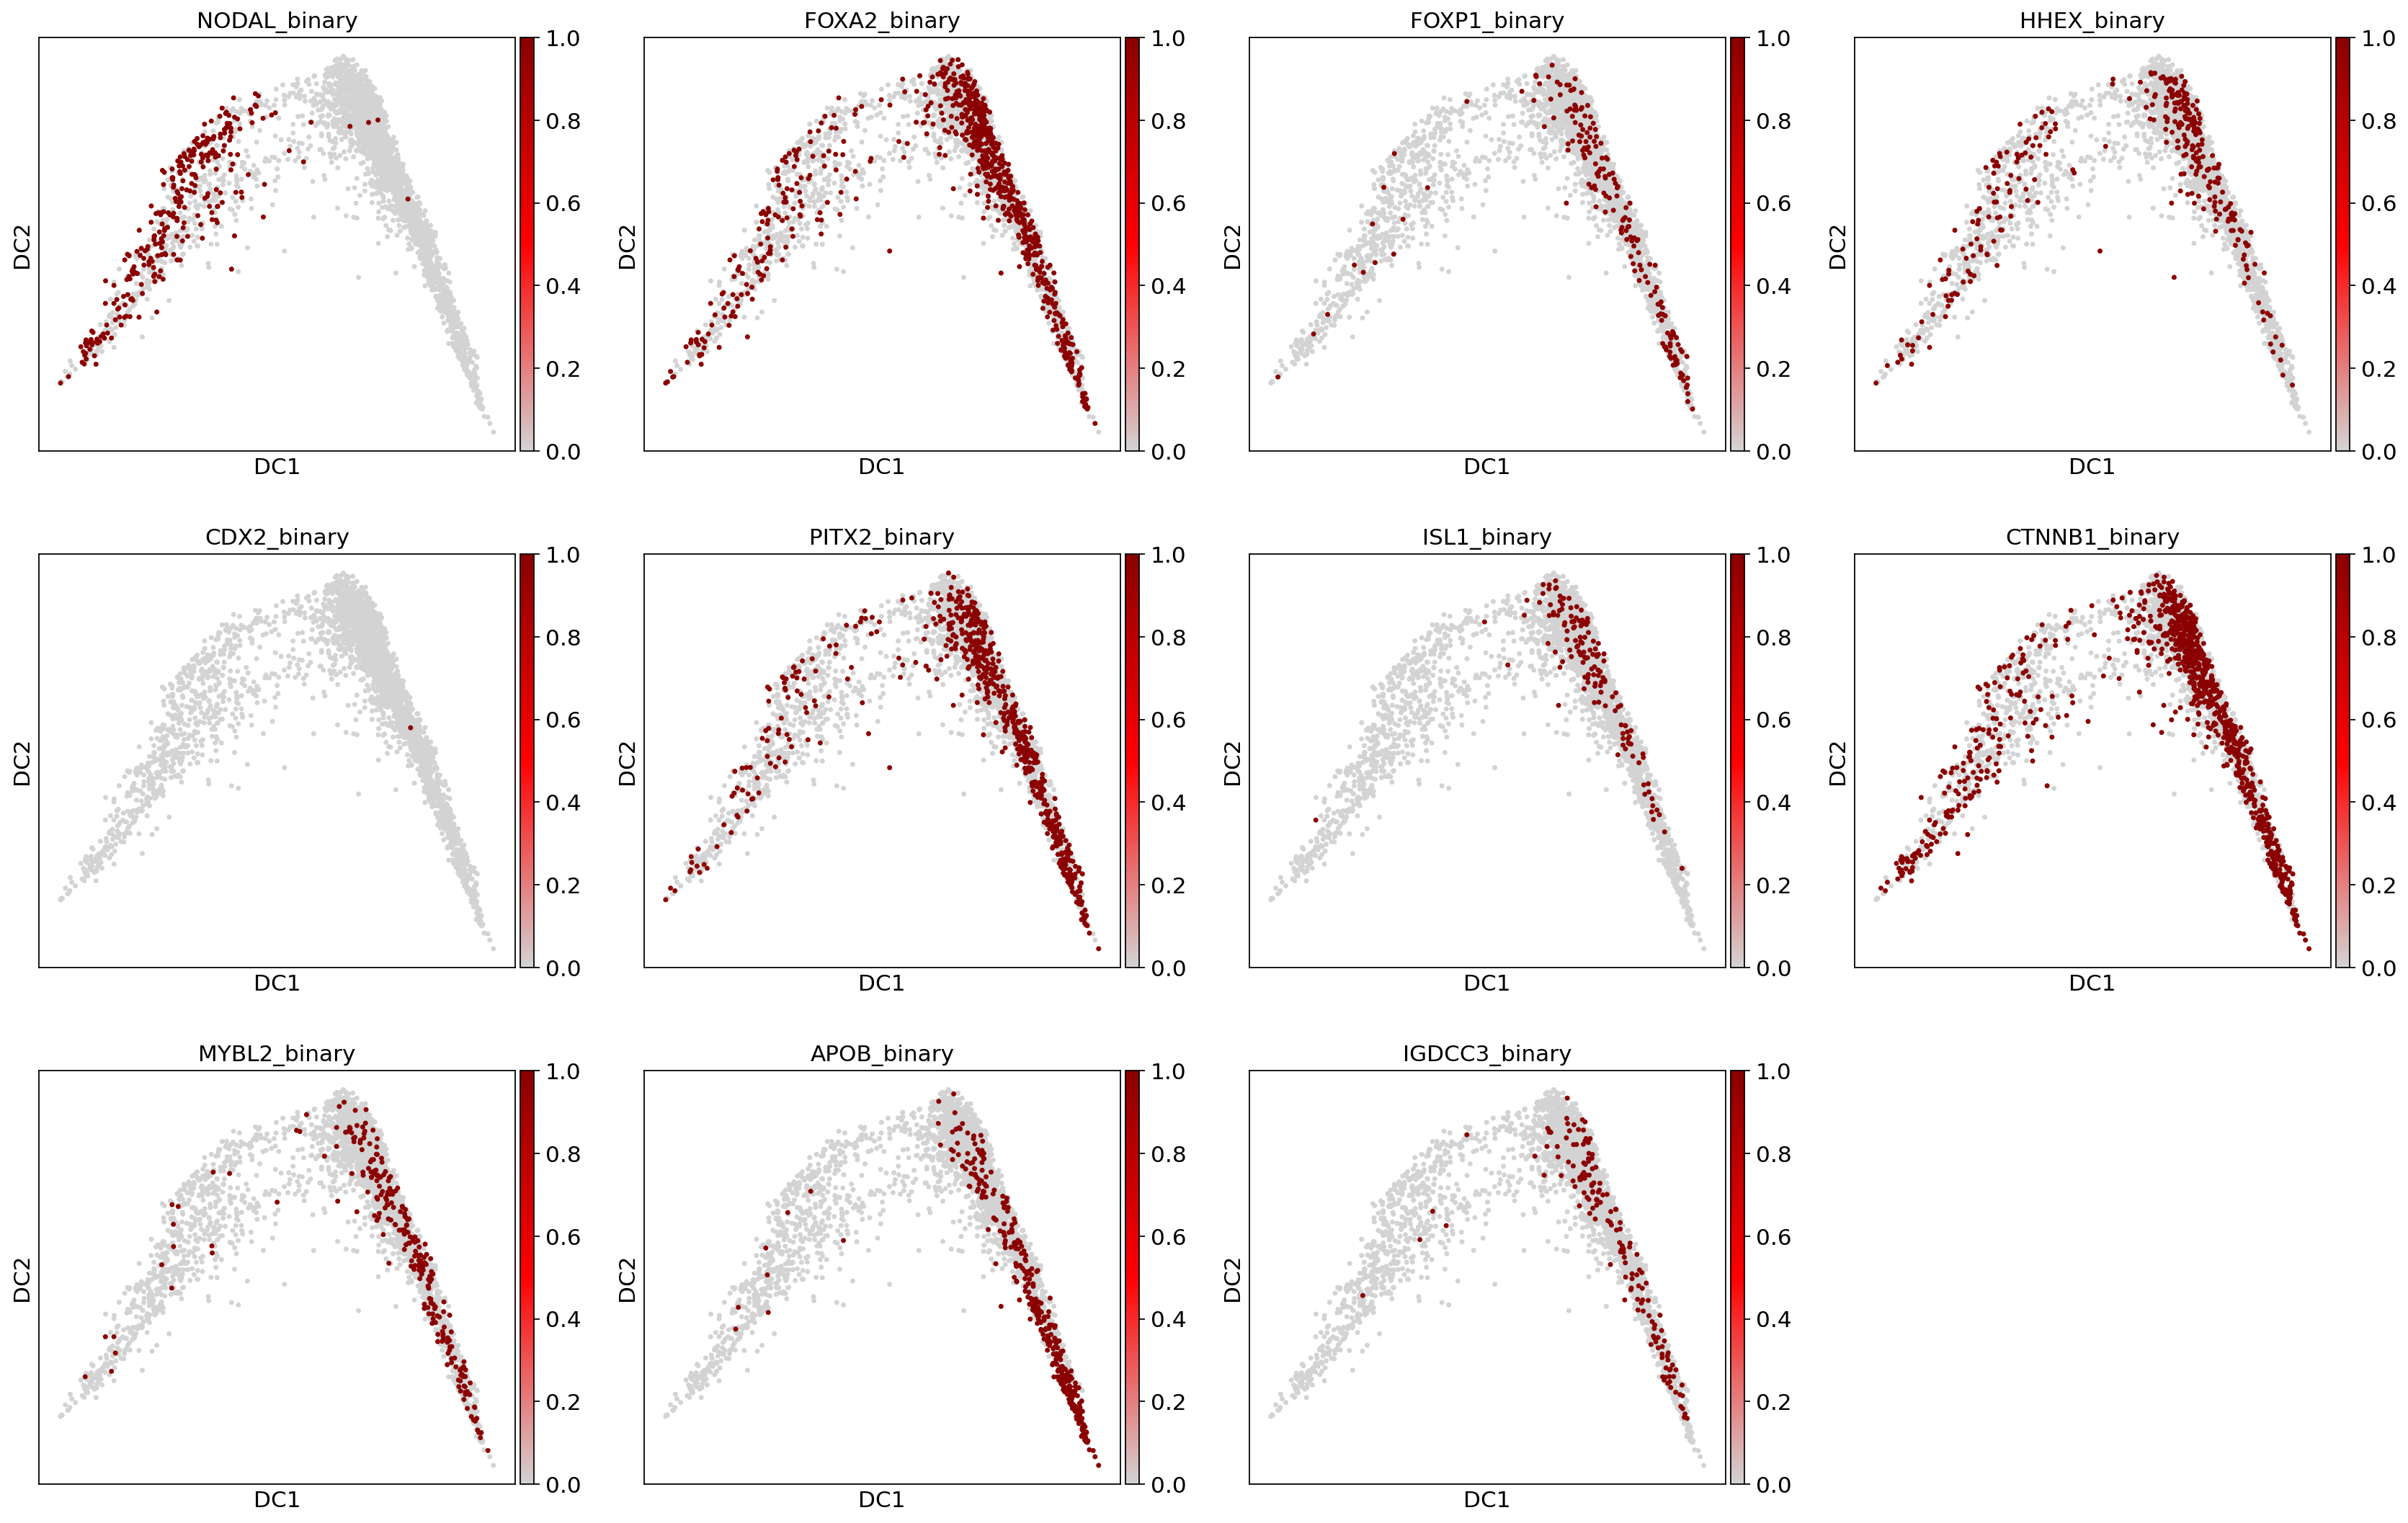

In [8]:
genes = ["NODAL", "FOXA2", "FOXP1", "HHEX", "CDX2", "PITX2", "ISL1", "CTNNB1", "MYBL2", "APOB", "IGDCC3"]
genes_plot = []

for gene in genes:
    fe.obs["%s_binary" %gene] = fe.raw.X[:, np.where(fe.var_names == gene)[0]].todense() > 0
    genes_plot.append("%s_binary" %gene)

sc.pl.diffmap(fe, color = genes_plot, cmap = gray_red)